In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn

suv_dataset = pd.read_csv('SUV.csv')

In [110]:
suv_dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [111]:
#Analyzing data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

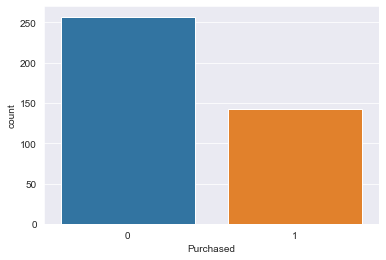

In [112]:
sns.countplot(x='Purchased',data=suv_dataset)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

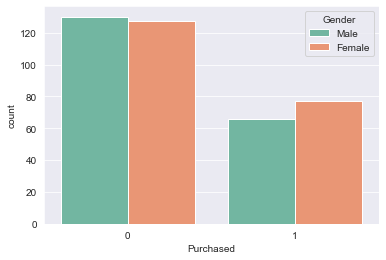

In [113]:
sns.countplot(x='Purchased',hue='Gender',palette='Set2',data=suv_dataset)

<AxesSubplot:ylabel='Frequency'>

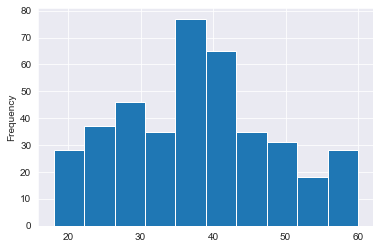

In [114]:
suv_dataset["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

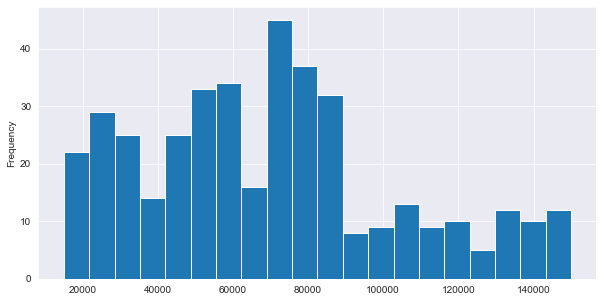

In [115]:
suv_dataset["EstimatedSalary"].plot.hist(bins=20,figsize=(10,5))

In [116]:
suv_dataset.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

<AxesSubplot:xlabel='Age', ylabel='count'>

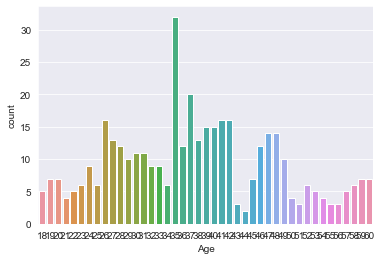

In [117]:
sns.countplot(x="Age",data=suv_dataset)

In [118]:
##Data wrangling

In [119]:
suv_dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


<AxesSubplot:>

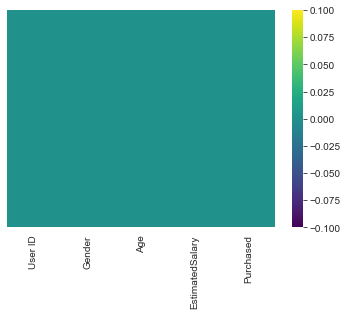

In [120]:
sns.heatmap(suv_dataset.isnull(),yticklabels=False,cmap="viridis")#cmap for color

In [121]:
suv_dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [122]:
#train data

In [123]:
suv_dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [124]:
suv_dataset.drop(["User ID"],axis=1,inplace=True)

In [125]:
suv_dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [126]:
suv_dataset=pd.get_dummies(suv_dataset,drop_first=True)

In [127]:
suv_dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [128]:
x=suv_dataset.drop("Purchased",axis=1)
y=suv_dataset["Purchased"]
y.unique()

array([0, 1], dtype=int64)

In [129]:
suv_dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel=LogisticRegression()
y_train

39     0
167    0
383    1
221    1
351    0
      ..
255    1
72     0
396    1
235    1
37     0
Name: Purchased, Length: 280, dtype: int64

In [134]:
x_train

,Age,EstimatedSalary,Gender_Male
39,27,31000,0
167,35,71000,0
383,49,28000,1
221,35,91000,1
351,37,75000,1
...,...,...,...
255,52,90000,0
72,20,23000,0
396,51,23000,1
235,46,79000,1


In [135]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [136]:
LogisticRegression()

LogisticRegression()

In [137]:
prediction = logmodel.predict(x_test)

In [138]:
from sklearn.metrics import classification_report

In [139]:
classification_report(y_test,prediction)

D:\software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        72\n           1       0.00      0.00      0.00        48\n\n    accuracy                           0.60       120\n   macro avg       0.30      0.50      0.37       120\nweighted avg       0.36      0.60      0.45       120\n'

In [140]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,prediction)

0.6